In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drugs = pd.read_csv('./drugdataset.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,1,1,13.093,drugC
2,47,0,1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,1,1,18.043,drugY


In [3]:
drugs.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
drugs.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,1.090000,0.515000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,0.000000,1.000000,1.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


In [5]:
#Create x and y variables
X = drugs.drop('Drug',axis=1).to_numpy()
y = drugs['Drug'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [6]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5,4,5),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)  

mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['drugA','drugB','drugC', 'drugX', 'drugY']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names)) 

[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1 17]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       0.92      1.00      0.96        11
       drugY       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



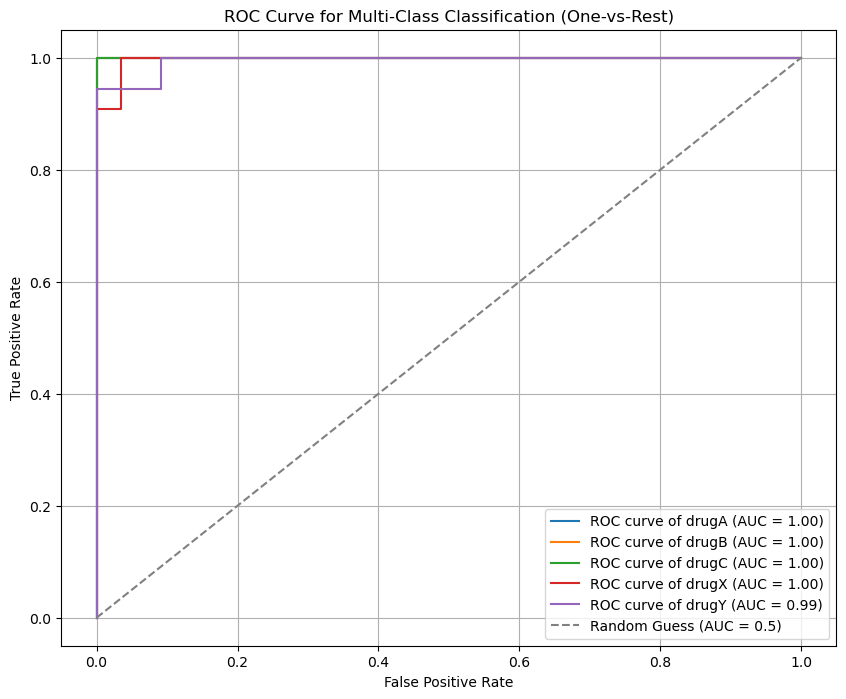

In [7]:
# Step 1: Import additional libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Step 2: Get prediction probabilities (probability estimates for each class)
y_prob = mlp.predict_proba(x_test2)  # Get probabilities for each class

# Step 3: Binarize the true labels (convert the 'y_test' into binary form for multi-class ROC)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Step 4: Calculate ROC and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 5: Plot the ROC Curve for each class
plt.figure(figsize=(10, 8))

# Plot each class' ROC curve
for i in range(len(target_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of {target_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess (AUC = 0.5)')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

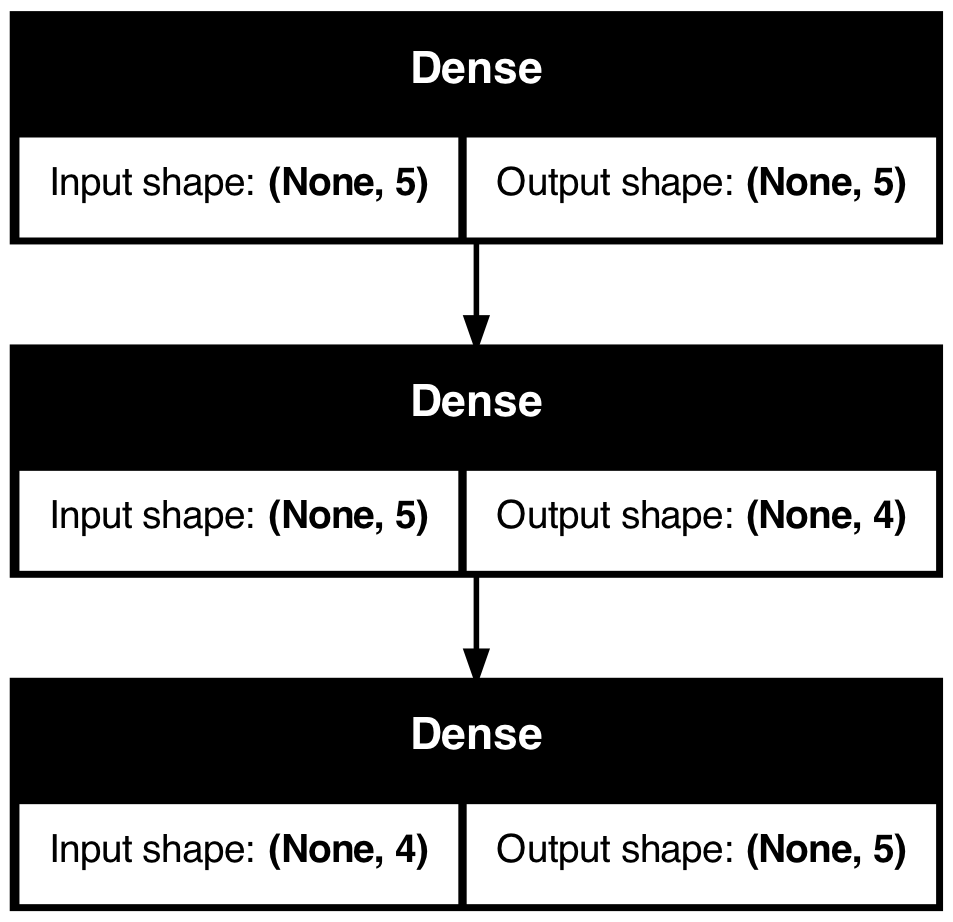

In [8]:
# Step 1: Import necessary libraries
import os
# Step 2: Set environment variable for Graphviz path
os.environ["PATH"] += ":/opt/homebrew/bin"
os.environ["GRAPHVIZ_DOT"] = "/opt/homebrew/bin/dot"

# Step 3: Import other necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Input

# Create the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape
    Dense(5, activation='relu'),
    Dense(4, activation='relu'),
    Dense(5, activation='softmax')
])

# Summary of the model architecture
model.summary()

# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)